# Pandas

In [139]:
import numpy as np
import pandas as pd

## 데이터 표준화

- 여러 곳에서 수집한 데이터들은 단위 선택, 대소문자 구분, 약칭 활용 등 여러가지 원인에 의해 다양한 형태로 표현된다.
- 서로 다른 단위가 섞여 있거나 같은 대상을 다른 형식으로 표현한 경우가 의외로 많다.
- 데이터 포맷을 일관성 있게 표준화하는 작업이 필요하다.

### 단위 환산

- 같은 데이터셋 안에서 서로 다른 측정 단위를 사용한다면, 전체 데이터의 일관성 측면에서 문제가 발생한다.
- 측정 단위를 동일하게 맞출 필요가 있다.

In [140]:
df = pd.read_csv( 'auto-mpg.csv', header = None )

In [141]:
df.columns = [ 'mpg', 'cylinder', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name' ] 

In [142]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [143]:
df.info

<bound method DataFrame.info of       mpg  cylinder  displacement horsepower  weight  acceleration  \
0    18.0         8         307.0      130.0  3504.0          12.0   
1    15.0         8         350.0      165.0  3693.0          11.5   
2    18.0         8         318.0      150.0  3436.0          11.0   
3    16.0         8         304.0      150.0  3433.0          12.0   
4    17.0         8         302.0      140.0  3449.0          10.5   
..    ...       ...           ...        ...     ...           ...   
393  27.0         4         140.0      86.00  2790.0          15.6   
394  44.0         4          97.0      52.00  2130.0          24.6   
395  32.0         4         135.0      84.00  2295.0          11.6   
396  28.0         4         120.0      79.00  2625.0          18.6   
397  31.0         4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70      

In [144]:
# mpg( mile per gallon )를 kpㅣ( kilometer per liter )로 변환
# mpg_to_kpi = 0.425
# 1 mile : 1.60934km, 1 gallon : 3.78541 liter
mpg_to_kpl = 1.60934 / 3.78451

In [145]:
df[ 'kgl' ] = df[ 'mpg' ] * mpg_to_kpl   # 데이터 분석을 표준화하여 분석에 용이하게 하기 위해 파생 변수 추가

In [146]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,name,kgl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.654391
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.378659
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.654391
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.803903
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.229147


In [147]:
df['kgl'] = df['kgl'].round(2) # 소숫점 줄이기 (소숫점 둘째자리 까지)

In [148]:
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,model year,origin,name,kgl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


### 자료형 변환

- 숫자가 문자열( object )로 저장된 경우에 숫자형( int / float )으로 변환해야 한다.
-  자료형 확인은 info()메서드나 dtype 속성으로 확인한다.


In [149]:
df.info()       # 마력이 원래는 플롯으로 잡혀야 하는데 보면 오브젝트(문자열)로 잡혀있다. 변환해줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinder      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   kgl           398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [150]:
df[ 'horsepower' ].unique() # horsepower가 왜 object로 나왔냐면 값에 '?'이 있기 때문에 object로 나옴
                            # innull로 해도 ?로 채워져있기 때문에 결측치 처리도 안됨

array(['130.0', '165.0', '150.0', '140.0', '198.0', '?', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '112.0', '92.00', '145.0', '137.0',
       '158.0', '167.0', '94.00', '107.0', '230.0', '49.00', '75.00',
       '91.00', '122.0', '67.00', '83.00', '78.00', '52.00', '61.00',
       '93.00', '148.0', '129.0', '96.00', '71.00', '98.00', '115.0',
       '53.00', '81.00', '79.00', '120.0', '152.0', '102.0', '108.0',
       '68.00', '58.00', '149.0', '89.00', '63.00', '48.00', '66.00',
       '139.0', '103.0', '125.0', '133.0', '138.0', '135.0', '142.0',
       '77.00', '62.00', '132.0', '84.00', '64.00', '74.00', '116.0',
       '82.00'], dtype=object)

In [151]:
# 누락 데이터( ? ) 삭제
df[ 'horsepower' ].replace( '?', np.nan, inplace = True ) # '?'를  NaN으로 변경
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True ) # NaN 포함행 삭제
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' ) # object를 float으로 변환

In [152]:
df.dtypes    # 데이터 타입 변경후 확인 (플롯으로 변경됨)

mpg             float64
cylinder          int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kgl             float64
dtype: object

### 범주형(category)으로 변환

In [153]:
df[ 'origin' ].unique()

array([1, 3, 2], dtype=int64)

In [154]:
df[ 'origin' ].replace( { 1: 'USA', 2: 'EU', 3: 'JPN' }, inplace = True )
df[ 'origin' ].unique()

array(['USA', 'JPN', 'EU'], dtype=object)

In [155]:
df[ 'origin' ].dtypes

dtype('O')

In [156]:
# 범주형 : 유한 개의 고유값이 반복적으로 나타나는 경우 범주형( category )데이터로 표현하는 것이 효율적이다.
#astype( 'category' ) : 범주형, astype( 'str' ) : 문자열
df[ 'origin' ] = df[ 'origin' ].astype( 'category' )

In [157]:
df.dtypes

mpg              float64
cylinder           int64
displacement     float64
horsepower       float64
weight           float64
acceleration     float64
model year         int64
origin          category
name              object
kgl              float64
dtype: object

In [158]:
df[ 'model year' ].sample( 3 ) # 3개를 임의로 가져온 것

58     72
164    75
373    82
Name: model year, dtype: int64

In [159]:
df[ 'model year' ] = df[ 'model year' ].astype( 'category' )

In [160]:
df[ 'model year' ].sample( 3 )  # 3개를 임의로 가져온 것 / # 70년대~80년대 반복되니까 범주형으로 바꾸면 분석시 편하다

231    77
191    76
143    74
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]

In [161]:
# -> 즉 데이터를 보고 특성을 파악해서 변수의 특성을 어떻게 변환시키는게 분석시 용이할지 생각해야 함

### 범주형 데이터 처리

#### 구간 분할
 - 데이터 분석 알고리즘에 따라서는 연속 데이터를 그대로 사용하기 보다는 일정한 구간( bin )으로 나눠서 분석하는 것이 효율적인 경우가 있다.
 - 가격, 비용, 효율 등 연속적인 값을 일정한 수준이나 정도를 나타내는 이산적인 값으로 나타내어 구간별 차이를 드러내는 것이다.
 - 연속 변수를 일정한 구간으로 나누고, 각 구간을 범주형 이산 변수로 변환하는 과정을 구간 분할(bining)이라고 한다.
 - cut() 함수를 이용하여 연속 데이터를 여러 구간으로 나누고 범주형 데이터로 변환할 수 있다. 
 - 경계값을 구하는 방법 중에서 NumPy의 histogram()함수를 활용할 수 있다.
 - 나누려는 구간(bin) 개수를 bins 옵션에 입력하면 각 구간에 속하는 값의 개수(count)와 경계값 리스트(bin_dividers)를 반환한다.

In [162]:
count, bin_dividers = np.histogram( df[ 'horsepower'], bins = 3 )
count, bin_dividers
# count와 bin_dividers로 언패킹 한 것

(array([257, 103,  31], dtype=int64),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

In [164]:
np.histogram( df[ 'horsepower'], bins = 3 )

(array([257, 103,  31], dtype=int64),
 array([ 46.        , 107.33333333, 168.66666667, 230.        ]))

In [36]:
# (array([257, 103,  31], dtype=int64),   -> 3개 구간으로 나누었을 때 데이터 수들 [a, b, c]
#  array([ 46.        , 107.33333333, 168.66666667, 230.        ]))  -> 구간별 경계값

In [37]:
bin_names = [ '저출력', '보통출력', '고출력' ]

df[ 'hp_bin' ] = pd.cut( x = df[ 'horsepower'],    # 데이터 배열
                         bins = bin_dividers,      # 경계값 리스트
                         labels = bin_names,       # bin 이름
                         include_lowest = True )  # 첫 경계값 포함 

In [38]:
df[ [ 'horsepower', 'hp_bin' ] ].head( 15 )

,horsepower,hp_bin
0,130.0,보통출력
1,165.0,보통출력
2,150.0,보통출력
3,150.0,보통출력
4,140.0,보통출력
5,198.0,고출력
7,215.0,고출력
8,225.0,고출력
9,190.0,고출력
10,170.0,고출력


### 더미 변수

- 범주형( category )를 나타내는 범주형( category ) 데이터를 회귀분석 등 머신러닝 알고리즘에 바로 사용할 수 없는 경우가 있는데, 컴퓨터가 인식 가능한 입력값으로 변환해야 한다.
- 컴퓨터가 인식 가능한 0 / 1로 표현하는 더미 변수(dummy variable )를 사용한다.
- 0 / 1은 수의 크기를 나타내지 않고, 어떤 특성( feature )이 있는지 없는지 여부만 표시한다.
- 해당 특성이 존재하면 1로 표현하고, 존재 하지 않으면 0으로 구분하는 개념이다.
- 범주형 데이터를 컴퓨터가 인식할 수 있도록 숫자 0 / 1로만 구성되는 one-hot vector로 변환한다고 해서 one-hot encording이라고 부른다,
- get_dummies() 함수는 범주형 변수의모든 고유값을 각각 새로운 더미 변수로 변환한다.

In [41]:
horsepower_dummies = pd.get_dummies( df[ 'hp_bin' ] )

In [42]:
horsepower_dummies

,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393,1,0,0
394,1,0,0
395,1,0,0
396,1,0,0


In [43]:
# 	저출력	보통출력	고출력
# 0	0	1	0   -> 010이라고 하면 보통출력이라고 컴퓨터에 입력되게 하는 것/ 즉 인덱스0은 010으로 보통출력 임
# 1	0	1	0
# 2	0	1	0
# 3	0	1	0
# 4	0	1	0
# ...	...	...	...
# 393	1	0	0   -> 100은 저출력이라고 인식되게 컴퓨터에 입력하는 것
# 394	1	0	0
# 395	1	0	0
# 396	1	0	0
# 397	1	0	0
# -> one-hot vector는 '저출력', '보통출력', '고출력'으로 1차원이 3개 있어서 3차원 백터 ( '저출력', '보통출력', '고출력' )이 된다.
# -> 백터의 요소수를 백터 차원으로 생각하면 된다 즉 위에는 요소가 3개가 있으니 3차원 백터이다.
# -> 이러한 것을 one-hot encording이라고 하고 이것을 one-hot vector를 이용한 ne-hot encording이라고 한다.
# -> 원핫 백터는 원핫 인코딩을 이용하기 위한 백터, 원핫 인코딩은 원핫 백터를 이용한 인코딩
# -> 위에것은 encording한 표이다.
# -> 이러한 원핫 인코딩을 만드는 함수가 get_dummies() 함수 이다.

## 정규화( normalization)

- 각 변수(column)에 들어 있는 숫자 데이터의 상대적 크기 차이 때문에 머신러닝 분석 결과가 달라질 수 있다.
   - 예로 A 변수는  0 ~ 1000 범위의 값을 갖고, B 변수는  0 ~ 1 범위의 값을 갖는다면, 상대적으로 큰 값을 갖는다면 상대적으로 큰 값을      갖는 A 변수의 영향이 더 커진다.
- 숫자 데이터의 상대적인 크기 차이를 제거할 필요가 있는데, 각 변수에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것을 정규화(normalization)이라 한다.
- 정규화 과정을 거친 데이터의 범위는 0 ~ 1 또는 -1 ~ 1이 된다. (어떤값이었던 이렇게 됨)
- 즉 몸무게는 10의 단위이고 키는 100의 단위인데 이 차이를 동일한 크기 기준으로 나눈 것을 정규화라고 하고 이것을 해야 분석에 용이

#### 하나의 방법

- 각 변수( column )의 데이터를 해당 열의 최대값( 의 절대값 )으로 나누는 방법이 있다.
- 어던 변수의 요소 값을 그 변수의 최대값으로 나누면 가장 큰 값은 최대값 자기자신을 나눈 1이다.


In [44]:
df.horsepower.describe()

count    391.000000
mean     104.173913
std       38.092740
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [45]:
# horsepower 변수의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs( df.horsepower.max() )

In [46]:
df.horsepower.head()

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

In [47]:
# 위에 방법은 최대값으로 나눈 값을 썼으니 값은 0~1를 갖는다 0~1사이로 데이터 값의 범위를 축소한 것

In [48]:
df.horsepower.describe()     # 위의 describe랑 비교해보기 (정규화 한 것)

count    391.000000
mean       0.452930
std        0.165621
min        0.200000
25%        0.326087
50%        0.404348
75%        0.543478
max        1.000000
Name: horsepower, dtype: float64

### 또 하나의 방법

- 각 변수의 데이터 중에서 최대값과 최소값을 뺀 값으로 나누는 방법이다.
- 각 변수 데이터에서 해당 변수의 최소값을 뺀, 값을 분자로 하고, 해당 열의 최대값과 최소값의 차를 분모로 하는 수를 계산하면 가장 큰 값든 역시 1이 된다.

In [49]:
df = pd.read_csv( 'auto-mpg.csv', header = None )

df.columns = [ 'mpg', 'cylinder', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name' ] 

# 누락 데이터( ? ) 삭제
df[ 'horsepower' ].replace( '?', np.nan, inplace = True ) # '?'를  NaN으로 변경
df.dropna( subset = [ 'horsepower' ], axis = 0, inplace = True ) # NaN 포함행 삭제
df[ 'horsepower' ] = df[ 'horsepower' ].astype( 'float' ) # object를 float으로 변환

In [50]:
df.horsepower.describe()    # 위에 정규화 이전 데이터를 불러온 것 / 초기화

count    391.000000
mean     104.173913
std       38.092740
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [53]:
# 정규화
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x / min_max

In [54]:
df.horsepower.head()

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

In [57]:
df.horsepower.describe()    # 0~1 사이의 값을 가지므로 비교분석이 용이하게 됨

count    391.000000
mean       0.316163
std        0.207026
min        0.000000
25%        0.157609
50%        0.255435
75%        0.429348
max        1.000000
Name: horsepower, dtype: float64

## 함수 매핑( mapping )

- 함수 매핑은 Series / DataFrame의 개별 요소를 특정 함수에 일대일 대응시키는 과정을 말한다.
- 사용자가 직접 만든 함수( lambda 함수 포함 )를 적용할 수 있기 때문에 pandas 기본 함수로 처리하기 어려운 복잡한 연산을 Series / DataFrame에 적용하는 것이 가능하다.

### 개별 요소에 함수 매핑

#### Series 요소에 함수 매핑

- Series 객체에 apply() 메서드를 적용하면 인자로 전달하는 매핑 함수에 Series의 모든 요소를 하나씩 입력하고 함수의 return값을 돌려받는다.
- Series 요소의 개수만큼 return값을 받아서 같은 크기의 Series 객체로 반환한다.

In [59]:
df = pd.DataFrame( { 'age': [ 22.0, 38.0, 26.0, 35.0, 35.0 ],
                     'fare': [ 7.2500, 71.2833, 7.9250, 53.100, 8.0500 ],
                     'ten': [ 10, 10, 10, 10, 10 ] } )
df

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [60]:
def add_10( n ):
    return n + 10
def add_two_obj( a ,b ):
    return a + b

# 함수 test
add_10( 10 ), add_two_obj( 10, 10 )

(20, 20)

In [64]:
sr1 = df[ 'age' ].apply( add_10 )
sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [65]:
sr2 = df[ 'age' ].apply( add_two_obj, b = 10 )
sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [63]:
# lambda 함수 활용
sr3 = df[ 'age' ].apply( lambda x : add_10( x ) )  # 앞에 lambda는 그냥 이름만 붙여 넣는 것 함수 쓸때
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [66]:
# alambda 함수 = 이름없는 함수 / 위에 lambda x(인수) : add_10( x )-결과값 리턴 

#### DataFrame 요소에 함수 매핑

- DataFrame의 개별 요소에 특정 함수를 매핑하려면, applymap() 메서드를 활용한다.
- 매핑( mapping ) 함수에 DataFrame의 각 요소를 하나씩 넣어서 return 값으로 돌려 받는다.
- 요소의 원래 위치에 매핑 함수에 return 값을 입력하여 동일한 형태의 DataFrame이 만들어 진다.


In [67]:
df_map = df.applymap( add_10 )
df_map

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20


In [68]:
# -> applymap()은 데이터 프레임 전체 각 요소에 add_10 함수를 적용한 것 

### Series 객체에 함수 매핑

- DataFrame의 각 열에 함수 매핑
- DataFrame에 apply( axis = 0 )메서드를 적용하면 모든 열을 하나씩 분리하여 매핑함수의 인자로 각 변수에 전달된다. 매핑 함수에 따라 반환되는 객체의 종류가 다르다. 

In [71]:
# Series를 입력받고 Series를 반환하는 함수를 매핑하면, DataFrame을 반환한다.
def missing_value( Series ):  # series 객체를 인자로 전달    -> age : 22, 38 ......
    return Series.isnull()    # series 객체에서 누락 data를 찾아 boolean
                              # series로 반환

In [72]:
result = df.apply( missing_value, axis = 0 )
result

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [73]:
# Series를 입력 받아서 하나의 값을 반환하는 함수를 매핑하면 Series를 반환
def min_max( x ):
    return x.max() - x.min()

In [74]:
result = df.apply( min_max )   # 기본값 axis = 0
result

age     16.0000
fare    64.0333
ten      0.0000
dtype: float64

#### DataFrame의 각 행에 함수 매핑

- DataFrame에 apply( axis = 1 ) 메서드를 적용하면 DataFrame의 각 행을 매핑함수의 인자로 전달한다.
- DataFrame의 행 인덱스가 매핑 결과로 반환되는 Series의 인덱스가 된다.
- Series의 인덱스에 매핑되는 데이터 값에는 각 행의 데이터를 함수에 적용한 return값을 가져온다.

In [76]:
x = df
a = df[ 'age' ]
b = df[ 'ten' ]

df[ 'add' ] = df.apply( lambda x : add_two_obj( x[ 'age' ], x[ 'ten' ] ),
                        axis = 1 )
df.head()

,age,fare,ten,add
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


#### DataFrame 객체에 함수 매핑

- DataFrame 객체에 함수를 매핑 하려면 pipe() 메서드를 활용한다.
- 사용하는 함수가 반환하는 return 값에 따라 pipe() 메서드가 return하는 객체의 종류가 결정된다.
- DataFrame을 반환하는 경우, Series를 반환하는 경우, 개별 값을 반환하는 경우로 나눌 수 있다.

In [90]:
def missing_value( x ):
    return x.isnull()

def missing_count( x ):
    return missing_value( x ).sum()

def total_number_missing( x ):
    return missing_count( x ).sum()

In [91]:
# DataFrame을 반환하는 경우
result_df = df.pipe( missing_value )
result_df

,age,fare,ten,add
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [92]:
# Series를 반환하는 경우
result_series = df.pipe( missing_count )
result_series

age     0
fare    0
ten     0
add     0
dtype: int64

In [93]:
# 개별 값을 반환하는 경우
result_value = df.pipe( total_number_missing )
result_value

0

## 필터링

- Series 또는 DataFrame의 데이터 중에서 특정 조건식을 만족하는 요소만 따로 추출하는 개념
- 가장 대표적인 방법은 boolean indexing이다.

#### boolean indexing

- Series 객체에 어떤 조건식을 적용하면 각 원소에 대해 참 / 거짓을 판별하여 boolean 값으로 구성된 Series를 반환한다.
- 참에 해당하는 데이터 값을 따로 선택할 수 있는데, 많은 데이터 중에서 어떤 조건을 만족하는 데이터만을 추출하는 필터링 기법의 한 유형이다.
- DataFrame의 각 열은 Series 객체이므로, 조건식을 적용하면 각 요소가 조건을 만족하는지 여부를 참 / 거짓 값으로 표시하여 boolean Series를 만들 수 있다.
- boolean Series를 DataFrame에 대입하면 조건을 만족하는 행들만 선택 할 수 있다.

In [94]:
df = pd.DataFrame( { 'age': [ 22.0, 38.0, 26.0, 35.0, 35.0 ],
                     'fare': [ 7.2500, 71.2833, 7.9250, 53.100, 8.0500 ],
                     'ten': [ 10, 10, 10, 10, 10 ],
                     'sex': [ 'male', 'female', 'female', 'male', 'female' ] } )
df

,age,fare,ten,sex
0,22.0,7.2500,10,male
1,38.0,71.2833,10,female
2,26.0,7.9250,10,female
3,35.0,53.1000,10,male
4,35.0,8.0500,10,female


In [95]:
mask = ( df.age >= 20 ) & ( df.age < 30 )
df_young = df.loc[ mask ]
df_young

,age,fare,ten,sex
0,22.0,7.250,10,male
2,26.0,7.925,10,female


In [96]:
mask = ( df.age >= 30 ) & ( df.sex == 'female' )              # & = and
df_female = df.loc[ mask ]
df_female

,age,fare,ten,sex
1,38.0,71.2833,10,female
4,35.0,8.0500,10,female


In [98]:
mask = ( df.age >= 30 ) | ( df.sex == 'female' )                 # | = or
df_female_under30 = df.loc[ mask ] 
df_female_under30

,age,fare,ten,sex
1,38.0,71.2833,10,female
2,26.0,7.9250,10,female
3,35.0,53.1000,10,male
4,35.0,8.0500,10,female


#### isin() 메서드 활용

- DataFrame의 열에 isin() 메서드를 적용하면 특정 값을 가진 행들을 따로 추출할 수 있다.
- isin() 메서드에 DataFrame의 열에서 추출하려는 값들로 만든 리스트를 전달한다.

In [100]:
df = pd.DataFrame( { 'age': [ 22.0, 38.0, 26.0, 35.0, 35.0 ],
                     'fare': [ 7.2500, 71.2833, 7.9250, 53.100, 8.0500 ],
                     'ten': [ 10, 10, 10, 10, 10 ],
                     'sibsp': [ 1, 3, 4, 5, 2 ] } )
df

,age,fare,ten,sibsp
0,22.0,7.2500,10,1
1,38.0,71.2833,10,3
2,26.0,7.9250,10,4
3,35.0,53.1000,10,5
4,35.0,8.0500,10,2


In [107]:
# boolean indexing을 이용한 필터링
mask1 = df[ 'sibsp' ] == 3
mask2 = df[ 'sibsp' ] == 4
mask3 = df[ 'sibsp' ] == 5
df_boolean = df[ mask1 | mask2 | mask3 ]
df_boolean

,age,fare,ten,sibsp
1,38.0,71.2833,10,3
2,26.0,7.9250,10,4
3,35.0,53.1000,10,5


In [109]:
# isin() 메서드를 이용한 필터링
isin_filter = df[ 'sibsp' ].isin( [ 3, 4, 5 ] )
df_isin = df[ isin_filter ]
df_isin

,age,fare,ten,sibsp
1,38.0,71.2833,10,3
2,26.0,7.9250,10,4
3,35.0,53.1000,10,5


## Pandas 내장 그래픽 도구

- Pandas에는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서, 별도의 import없이 간단하게 그래프를 그릴 수 있다.
- Pandas 그래프 도구를 사용하는 방법은 간단하다.
- Series / DataFrame 객체에 plot()메서드를 적용하여 그래프를 그린다.
- plot()메서드에 kind 옵션으로 그래프의 종류를 선택할 수 있다.

|kind 옵션|설명|kind 옵션|설명|
|:---:|:---:|:---:|:---:|
|'line'|선 그래프|'kde'|커널 밀도 그래프|
|'bar'|수직 막대 그래프|'area'|면적 그래프|
|'bath'|수평 막대 그래프|'pie'|파이 그래프|
|'his'|히스토그램|'scatter'|산점도|
|'box'|박스플롯|'hexbin'|고밀도 산점도|

## 선 그래프

- Series / DataFrame 객체에 plot() 메소드를 적용할 때, 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그린다.

In [112]:
df = pd.read_excel( '남북한발전전력량.xlsx' )

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [115]:
df.head(6)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239


In [117]:
df_ns = df.iloc[ [ 0, 5 ] , 3: ] # 남/북 발전량 합계 데이터만 추출
df_ns.index = [ 'South', 'north' ] # 행 인덱스 변경
df_ns.columns = df_ns.columns.map( int ) # 열 이름의 자료형을 int로 변경
df_ns.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
north,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


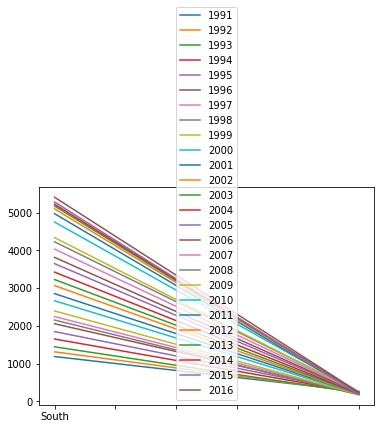

In [119]:
df_ns.plot()             # 아무옵션 없이 .plot()만 하면 선그래프를 디폴트로 선그래프가 나옴 / 축이 잘못(행,열)돼서 변경해야 함

In [120]:
tdf_ns = df_ns.T        # 행과 열 변경
tdf_ns.head()

,South,north
1991,1186,263
1992,1310,247
1993,1444,221
1994,1650,231
1995,1847,230


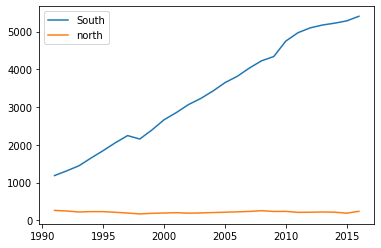

In [122]:
tdf_ns.plot()

### 막대 그래프

- plot() 메서드로 선 그래프가 아닌 다른 종류의 그래프를 그리려면, kind 옵션에 그래프 종류를 지정한다.
- 막대 그래프는 kind 옵션으로 'bar'를 지정한다.

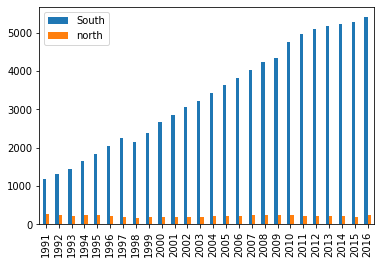

In [123]:
tdf_ns.plot( kind = 'bar' )

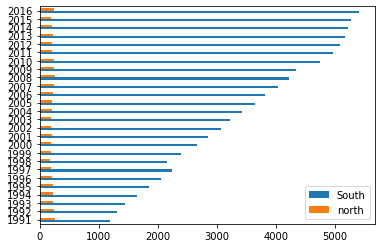

In [125]:
tdf_ns.plot( kind = 'barh' )

### 히스토그램

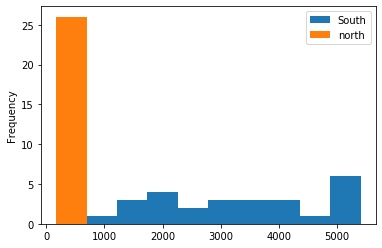

In [127]:
tdf_ns.plot( kind = 'hist' )                  # 해당 데이터에 적합한 그래프는 아님!

### 산점도

In [134]:
df = pd.read_csv( 'auto-mpg.csv', header = None )
df.columns = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name' ] 

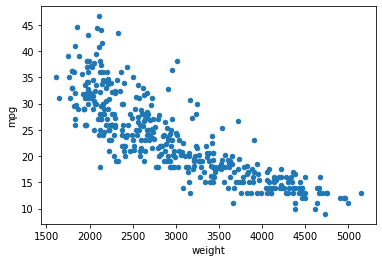

In [135]:
df.plot( x = 'weight', y = 'mpg', kind = 'scatter' )    # 산점도는 x, y의 변수에 이름 지정이 필요함

### 박스 플롯

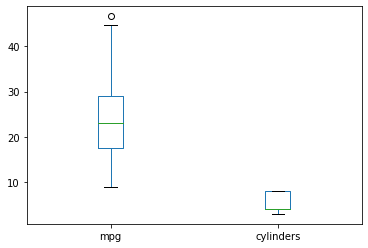

In [136]:
df[ [ 'mpg', 'cylinders' ] ].plot( kind = 'box' )